# ML using KNN

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
print(pd.__version__)

0.20.3


## First Step: Load Data and disassemble for our purposes

In [4]:
df = pd.read_csv('./insurance-customers-300.csv', sep=';')

In [5]:
y=df['group']

In [7]:
df.drop('group', axis='columns', inplace=True)

In [6]:
X = df.as_matrix()

In [8]:
df.describe()

,max speed,age,thousand km per year
count,300.000000,300.000000,300.000000
mean,171.863333,44.006667,31.220000
std,18.807545,16.191784,15.411792
min,132.000000,18.000000,5.000000
25%,159.000000,33.000000,18.000000
50%,171.000000,42.000000,30.000000
75%,187.000000,52.000000,43.000000
max,211.000000,90.000000,99.000000


## Second Step: First version using KNN

In [9]:
# ignore this, it is just technical code
# should come from a lib, consider it to appear magically 
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_print = ListedColormap(['#AA8888', '#004000', '#FFFFDD'])
cmap_bold = ListedColormap(['#AA4444', '#006000', '#AAAA00'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#FFFFDD'])
font_size=25

def meshGrid(x_data, y_data):
    h = 1  # step size in the mesh
    x_min, x_max = x_data.min() - 1, x_data.max() + 1
    y_min, y_max = y_data.min() - 1, y_data.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)
    
def plotPrediction(clf, x_data, y_data, x_label, y_label, colors, title="", mesh=True, fname=None):
    xx,yy = meshGrid(x_data, y_data)
    plt.figure(figsize=(20,10))

    if clf and mesh:
        Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    if fname:
        plt.scatter(x_data, y_data, c=colors, cmap=cmap_print, s=200, marker='o', edgecolors='k')
    else:
        plt.scatter(x_data, y_data, c=colors, cmap=cmap_bold, s=80, marker='o', edgecolors='k')
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    plt.title(title, fontsize=font_size)
    if fname:
        plt.savefig(fname)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((180, 4), (180,), (120, 4), (120,))

In [13]:
X_train_kmh_age = X_train[:, :2]
X_test_kmh_age = X_test[:, :2]
X_train_2_dim = X_train_kmh_age
X_test_2_dim = X_test_kmh_age

In [14]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(1)
%time clf.fit(X_train_2_dim, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.05 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

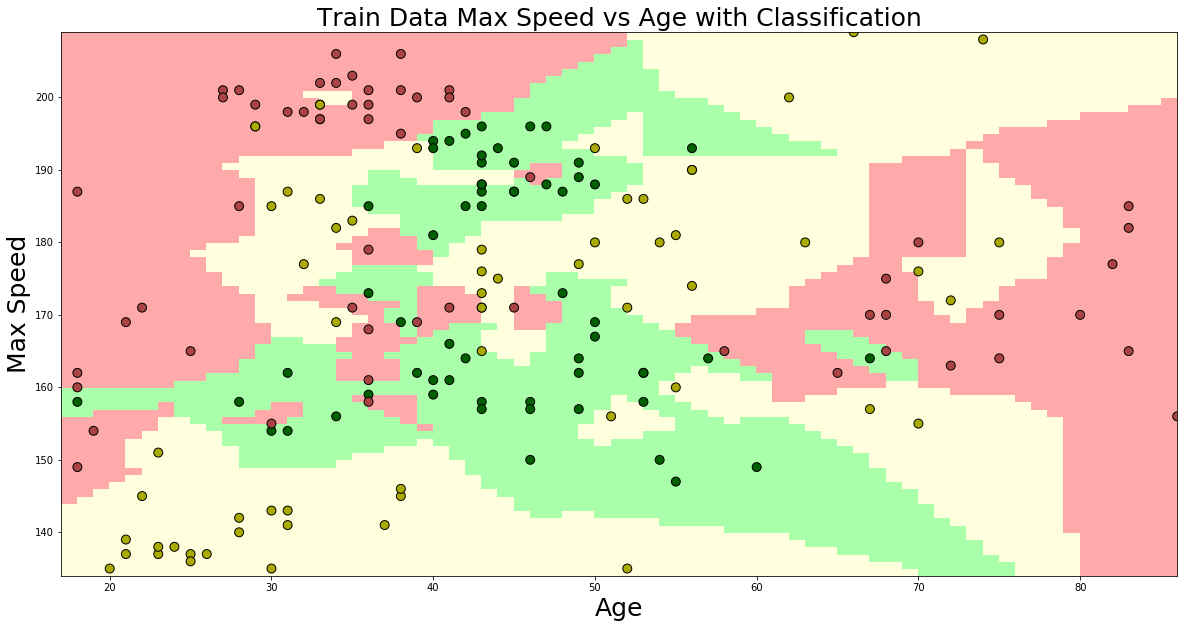

In [15]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data Max Speed vs Age with Classification")

### Look how great it is doing!

In [16]:
clf.score(X_train_2_dim, y_train)

0.97777777777777775

### But really?

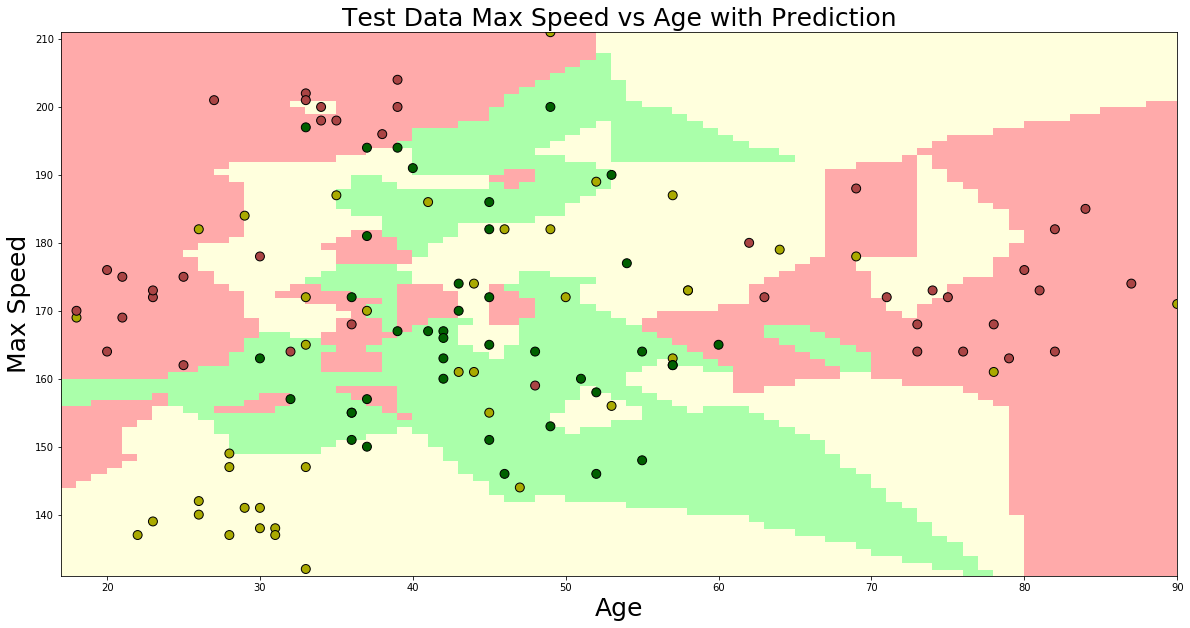

In [17]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data Max Speed vs Age with Prediction")

In [18]:
clf.score(X_test_2_dim, y_test)

0.65000000000000002

Probably still better than our manual result, but this is clearly overfitting

## Third Step: KNN with less overfitting, paying with underfitting

In [19]:
clf = neighbors.KNeighborsClassifier(13)
%time clf.fit(X_train_2_dim, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.2 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

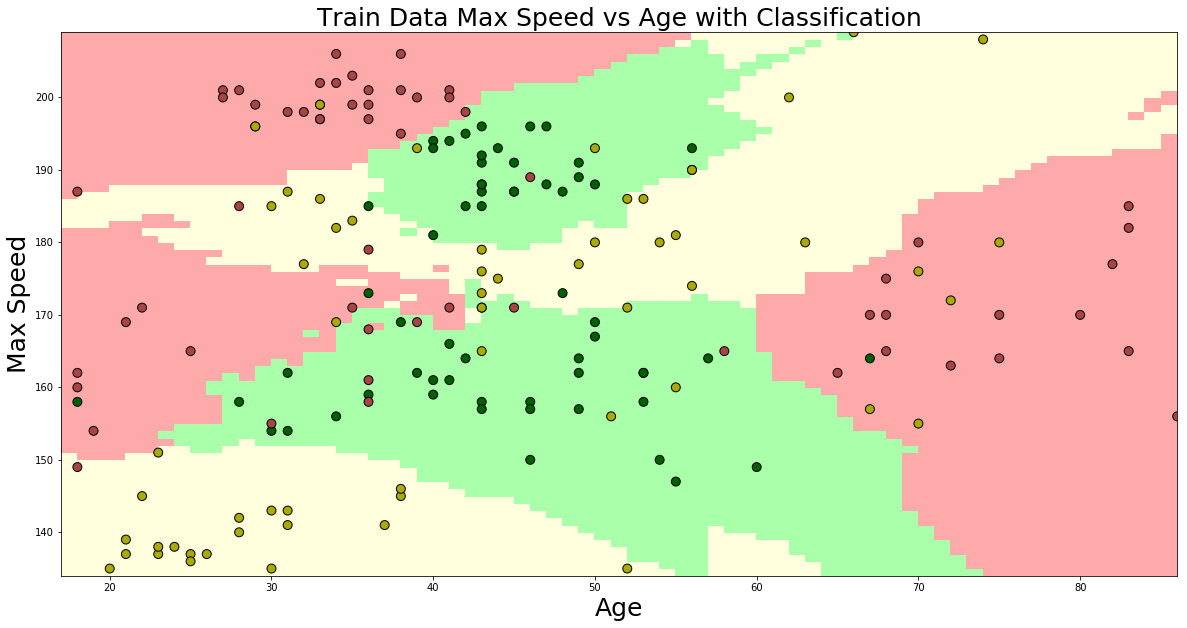

In [20]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data Max Speed vs Age with Classification")

In [21]:
clf.score(X_train_2_dim, y_train)

0.81111111111111112

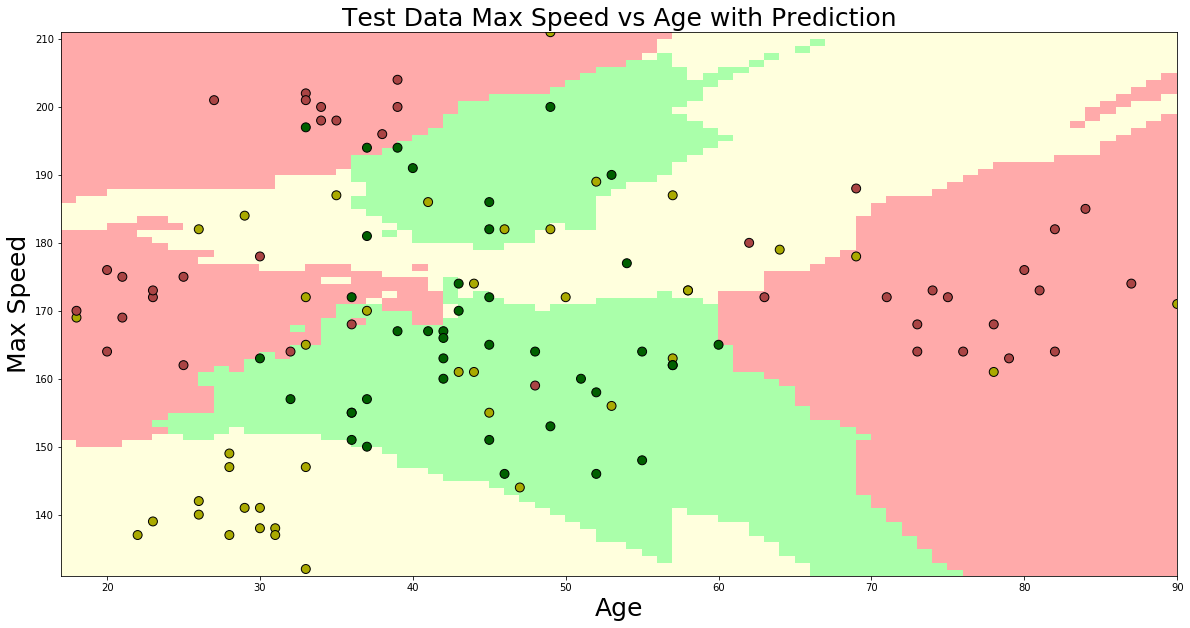

In [22]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data Max Speed vs Age with Prediction")

In [23]:
clf.score(X_test_2_dim, y_test)

0.7416666666666667

## Fourth Step: Confusion Matrix

In [24]:
clf = neighbors.KNeighborsClassifier(13)
%time clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 907 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [25]:
prediction = clf.predict(X)
y_pred = prediction
y_pred

array([1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 2, 1, 2, 0, 2,
       0, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 1, 2, 2,
       2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 2, 0, 1, 1, 2, 1, 1, 0, 2, 0, 0, 2, 0,
       1, 1, 1, 0, 2, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 1, 0, 2, 2,
       0, 1, 2, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1,
       0, 1, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 0, 2, 1, 1, 1, 2, 1,
       2, 2, 2, 0, 1, 2, 0, 1, 2, 1, 2, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 2,
       2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 0, 1, 1,
       1, 1, 2, 1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 2,
       1])

In [26]:
y_true = np.array(y)
y_true

array([1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 0, 2,
       0, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 1,
       0, 2, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 1, 1, 2,
       2, 0, 2, 0, 1, 0, 1, 1, 0, 2, 1, 0, 0, 1, 2, 2, 1, 0, 2, 0, 2, 2, 0,
       2, 1, 1, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 2, 2, 2, 0, 1, 1, 0, 1, 2, 0,
       1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 2, 1, 0, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2,
       2, 1, 2, 1, 0, 2, 1, 2, 0, 0, 2, 2, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 1,
       0, 1, 2, 2, 0, 1, 1, 0, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 1, 1, 1, 2, 1,
       2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 1, 0, 2, 0, 0, 1, 2, 1, 0, 2, 0, 0,
       2, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 1, 0, 1, 2, 1, 0, 2, 1, 0, 2, 2, 2,
       2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 2, 1, 0, 2, 2, 1, 1, 0, 1, 1,
       1, 1, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       1, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 2, 1, 2,
       2])

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[83, 13,  4],
       [ 5, 91,  4],
       [16, 26, 58]])

Text(33,0.5,'Ground Truth')

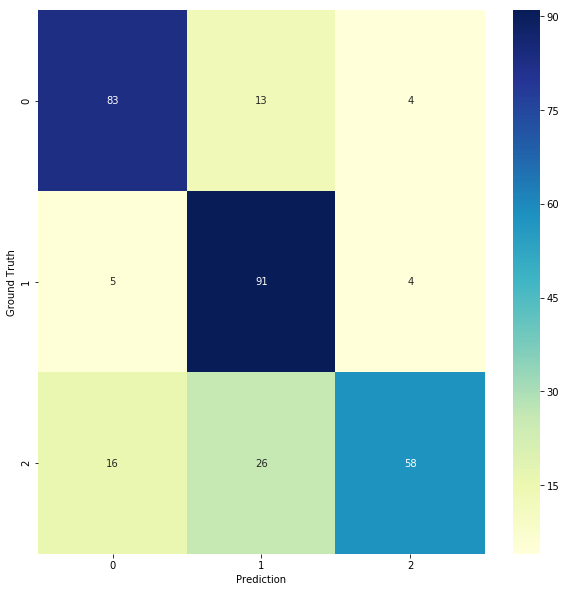

In [28]:
import seaborn as sns
sns.heatmap(cm, annot=True, cmap="YlGnBu")
figure = plt.gcf()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(111)
ax.set_xlabel('Prediction')
ax.set_ylabel('Ground Truth')